from tensorflow.contrib.keras.api.keras.layers import Dropout
from tensorflow.contrib.keras.api.keras.models import Sequential
from tensorflow.contrib.keras.api.keras.layers import Conv2D
from tensorflow.contrib.keras.api.keras.layers import MaxPooling2D
from tensorflow.contrib.keras.api.keras.layers import Flatten
from tensorflow.contrib.keras.api.keras.layers import Dense
from tensorflow.contrib.keras.api.keras.callbacks import Callback
from tensorflow.contrib.keras.api.keras.preprocessing.image import ImageDataGenerator
from tensorflow.contrib.keras import backend
import os

In [2]:
class LossHistory(Callback):
    def __init__(self):
        super().__init__()
        self.epoch_id = 0
        self.losses = ''
 
    def on_epoch_end(self, epoch, logs={}):
        self.losses += "Epoch {}: accuracy -> {:.4f}, val_accuracy -> {:.4f}\n"\
            .format(str(self.epoch_id), logs.get('acc'), logs.get('val_acc'))
        self.epoch_id += 1
 
    def on_train_begin(self, logs={}):
        self.losses += 'Training begins...\n'

In [3]:
# Initialising the CNN
classifier = Sequential()
 
# Step 1 - Convolution
input_size = (128, 128)
classifier.add(Conv2D(32, (3, 3), input_shape=(*input_size, 3), activation='relu'))
 
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))  # 2x2 is optimal
 
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
 
# Adding a third convolutional layer
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
 
# Step 3 - Flattening
classifier.add(Flatten())
 
# Step 4 - Full connection
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=2, activation='softmax'))
 
classifier.summary()
    
# Compiling the CNN
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxP

In [4]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Part 2 - Fitting the CNN to the images
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
training_set = train_datagen.flow_from_directory('PS-Battles/train_2',
                                                 target_size=input_size,
                                                 batch_size=batch_size,
                                                 class_mode='binary')
 
test_set = test_datagen.flow_from_directory('PS-Battles/test_2',
                                            target_size=input_size,
                                            batch_size=batch_size,
                                            class_mode='binary')

Found 2002 images belonging to 2 classes.
Found 602 images belonging to 2 classes.


In [5]:
model_details = classifier.fit_generator(training_set,
                         steps_per_epoch=1000,
                         epochs=100,
                         validation_data=test_set,
                         validation_steps=100,
                         workers=12
                         )

Epoch 1/100
63/63 [==============================] - 17s 275ms/step - loss: 2.8758 - acc: 0.5445 - val_loss: 0.7094 - val_acc: 0.3040
Epoch 2/100
63/63 [==============================] - 15s 236ms/step - loss: 0.6942 - acc: 0.4975 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/100
63/63 [==============================] - 15s 241ms/step - loss: 0.6931 - acc: 0.4990 - val_loss: 0.6929 - val_acc: 0.5000
Epoch 4/100
63/63 [==============================] - 15s 237ms/step - loss: 0.6927 - acc: 0.5045 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 5/100
63/63 [==============================] - 15s 233ms/step - loss: 0.6932 - acc: 0.4840 - val_loss: 0.6928 - val_acc: 0.5017
Epoch 6/100
63/63 [==============================] - 15s 237ms/step - loss: 0.6931 - acc: 0.4945 - val_loss: 0.6919 - val_acc: 0.5847
Epoch 7/100
63/63 [==============================] - 15s 236ms/step - loss: 0.6920 - acc: 0.5080 - val_loss: 0.6930 - val_acc: 0.5033
Epoch 8/100
63/63 [==============================] - 15s 234ms

Epoch 39/100
63/63 [==============================] - 16s 246ms/step - loss: 0.6026 - acc: 0.6518 - val_loss: 0.8338 - val_acc: 0.5498
Epoch 40/100
63/63 [==============================] - 15s 235ms/step - loss: 0.5862 - acc: 0.6623 - val_loss: 0.8570 - val_acc: 0.5449
Epoch 41/100
63/63 [==============================] - 15s 243ms/step - loss: 0.5918 - acc: 0.6698 - val_loss: 0.8148 - val_acc: 0.5432
Epoch 42/100
63/63 [==============================] - 15s 243ms/step - loss: 0.5870 - acc: 0.6828 - val_loss: 0.8353 - val_acc: 0.5166
Epoch 43/100
63/63 [==============================] - 15s 237ms/step - loss: 0.5703 - acc: 0.6788 - val_loss: 0.8103 - val_acc: 0.5332
Epoch 44/100
63/63 [==============================] - 15s 238ms/step - loss: 0.5752 - acc: 0.6668 - val_loss: 0.8535 - val_acc: 0.5282
Epoch 45/100
63/63 [==============================] - 15s 242ms/step - loss: 0.5628 - acc: 0.6838 - val_loss: 0.8847 - val_acc: 0.5399
Epoch 46/100
63/63 [==============================] - 1

In [6]:
# Save model
model_backup_path = 'PS-Battles/CNN1.h5'
classifier.save(model_backup_path)
print("Model saved to", model_backup_path)

Model saved to PS-Battles/CNN1.h5


In [7]:
import matplotlib 
from matplotlib import pyplot as plt
import numpy as np

def plot_model(model_details):

    # Create sub-plots
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_details.history['acc'])+1),model_details.history['acc'])
    axs[0].plot(range(1,len(model_details.history['val_acc'])+1),model_details.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_details.history['acc'])+1),len(model_details.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
   

    # Summarize history for loss
    axs[1].plot(range(1,len(model_details.history['loss'])+1),model_details.history['loss'])
    axs[1].plot(range(1,len(model_details.history['val_loss'])+1),model_details.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_details.history['loss'])+1),len(model_details.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')

    # Show the plot
    plt.show()

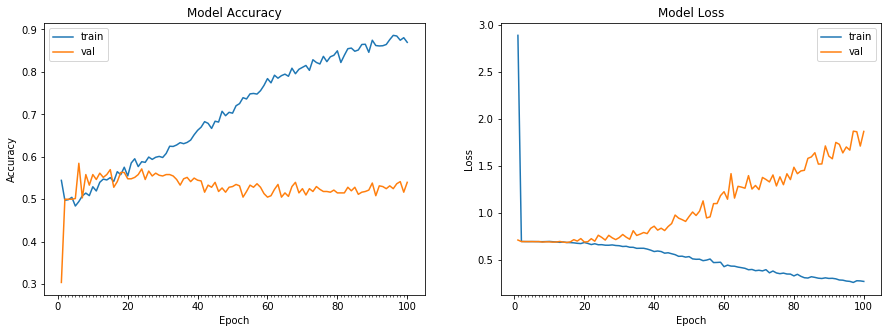

In [8]:
plot_model(model_details)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report

Y_pred = classifier.predict_generator(test_set, 600 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = ['Real', 'PS']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

Confusion Matrix
[[170 131]
 [172 129]]
Classification Report
              precision    recall  f1-score   support

        Real       0.50      0.56      0.53       301
          PS       0.50      0.43      0.46       301

   micro avg       0.50      0.50      0.50       602
   macro avg       0.50      0.50      0.49       602
weighted avg       0.50      0.50      0.49       602

